In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('datasets/cars.csv')
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
data.shape

(261, 8)

In [ ]:
# shg=uffle the data
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 89 to 253
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [6]:
data.columns = data.columns.str.lstrip()

In [7]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [9]:
# drop rows with missing values
data = data.dropna()
data.shape

(256, 8)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
89,31.0,4,119.0,82,2720.0,19,1983,2
90,34.1,4,86.0,65,1975.0,15,1980,1
158,19.0,6,232.0,100,2634.0,13,1972,2
247,44.3,4,90.0,48,2085.0,22,1981,0
170,32.4,4,107.0,72,2290.0,17,1981,1


In [11]:
data_x = pd.DataFrame(data, columns=['mpg', 'cylinders', 'cubicinches', 'hp'])
label_y = data['brand']

In [12]:
from sklearn.cluster import KMeans

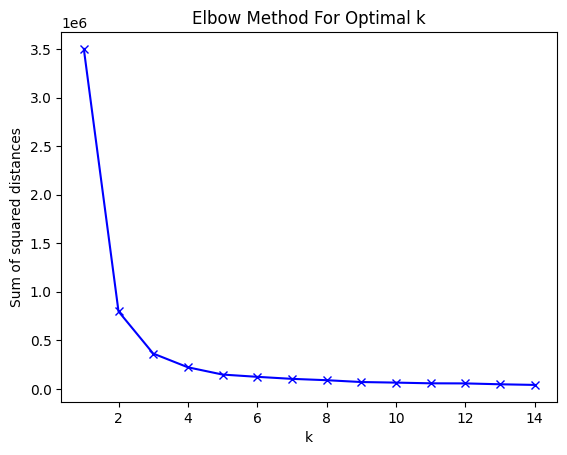

In [13]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
k_means = KMeans(n_clusters=3)
k_means.fit(data_x)

KMeans(n_clusters=3)

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_x, k_means.labels_)
print("Silhouette Score: ", score)

Silhouette Score:  0.6148167804439839


In [16]:
from sklearn.metrics import homogeneity_score
score = homogeneity_score(label_y, k_means.labels_)
print("Homogeneity Score: ", score)

Homogeneity Score:  0.35612613624175427


In [17]:
from sklearn.metrics import v_measure_score
score = v_measure_score(label_y, k_means.labels_)
print("V Measure Score: ", score)

V Measure Score:  0.3455329401424716


In [18]:
from sklearn.metrics import completeness_score
score = completeness_score(label_y, k_means.labels_)
print("Completeness Score: ", score)

Completeness Score:  0.33555174234107793


In [19]:
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(label_y, k_means.labels_)
print("Adjusted Rand Score: ", score)

Adjusted Rand Score:  0.09380232508496925
